In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from random import randint
import seaborn as sns

## **Leaky Integrate_and_Fire**

In [ ]:
class LIF_model():


    def __init__(self, I ,threshold, u_rest, u_reset, R_m, tau_m):

        self.I = I
        self.total_time = 100
        self.delta = 0.03125
        self.u_list = [self.total_time]
        self.u_list[0] = u_rest
        self.t_time = [self.total_time]
        self.t_time[0] = 0
        self.t_spike = []
        self.I_spike = []
        self.U = u_rest
        self.threshold = threshold
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.R_m = R_m
        self.tau_m = tau_m
        self.ISI = 0
        self.F =0

    def simulate(self):
      t0 = self.t_time[0]
      
      while True:    
        du = (-1 * (self.U - self.u_rest) + self.R_m * self.I(t0)/ 1000) / self.tau_m
        self.U += du * self.delta
        #self.U = self.u_rest + 1/1000 * self.R * self.I(t0) * (1 - np.exp( -t0 / self.tau_m))
        if self.U >= self.threshold:
          self.t_spike.append(t0)
          self.U = self.u_reset
        self.u_list.append(self.U)
        t0 += self.delta
        self.t_time.append(t0)
        if t0 > self.total_time:
          break
      return self.u_list


    def make_dataframe(self):
      data = pd.DataFrame(data = {'u': self.u_list , 'time':self.t_time })
      data['u'] = data['u'].round(4)
      data = data.set_index('time')
      return data

    def plot_model(self):
      plt.figure(figsize=(15, 5))
      sns.set_style("dark")
      plot = sns.lineplot(data = data, x = "time", y="u")
      plot.set_title('Leaky Integrate-and-Fire')
      plot.set_ylabel('Memberance Potential')


In [ ]:
def I1(t):
  return 4000 * (np.sin(t) + 0.9)

In [ ]:
lif = LIF_model(I1, threshold=-45, u_rest=-79, u_reset=-65, R_m=10, tau_m=8)
lif.simulate()
data = lif.make_dataframe()

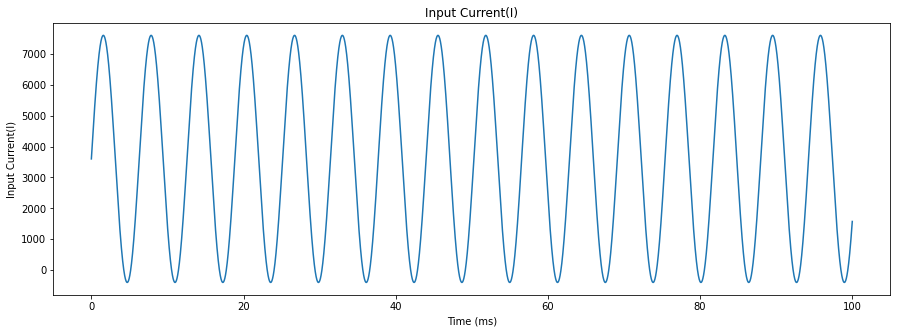

In [ ]:
x = np.linspace(0, 100, 8001)
plt.figure(figsize=(15, 5))
plt.plot(x, I1(x))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

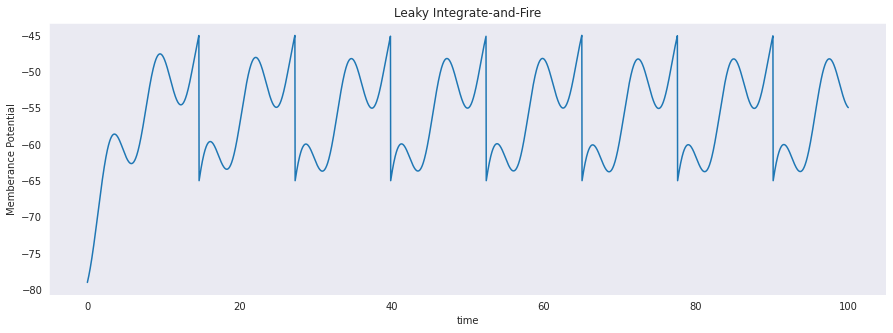

In [ ]:
lif.plot_model()

In [ ]:
def I2(t):
  if t > 30:
    return 3000
  return 0

In [ ]:
lif = LIF_model(I2, threshold=-55, u_rest=-75, u_reset=-60, R_m=20, tau_m=30)
lif.simulate()
data = lif.make_dataframe()

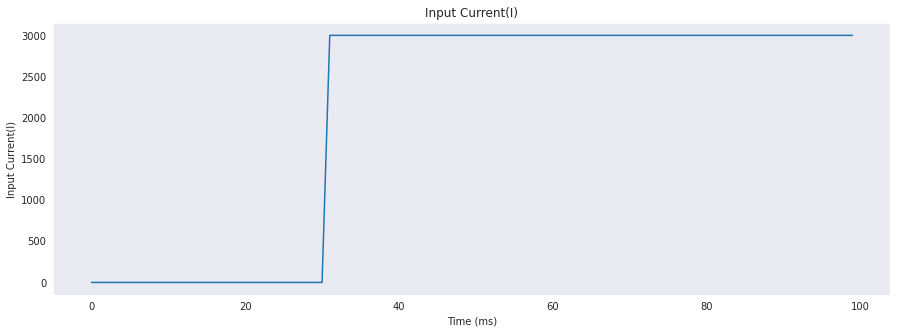

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(range(100), list(map(I2, range(100))))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

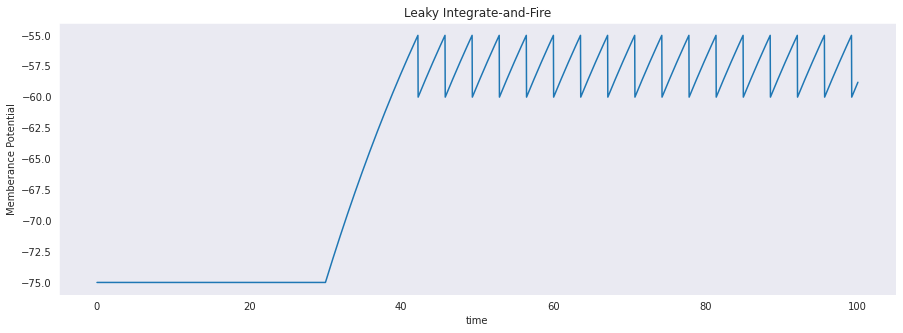

In [ ]:
lif.plot_model()

In [ ]:
def I3(t):
  return np.exp(t)

In [ ]:
lif = LIF_model(I3, threshold=-50, u_rest=-70, u_reset=-65, R_m=4, tau_m=23)
lif.simulate()
data = lif.make_dataframe()

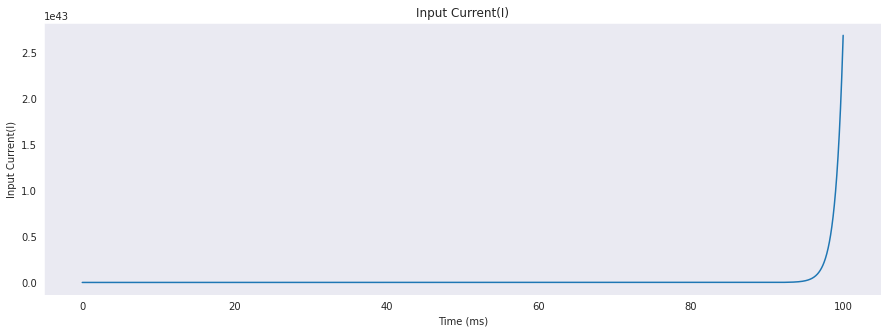

In [ ]:
x = np.linspace(0, 100, 8001)
plt.figure(figsize=(15, 5))
plt.plot(x, I3(x))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

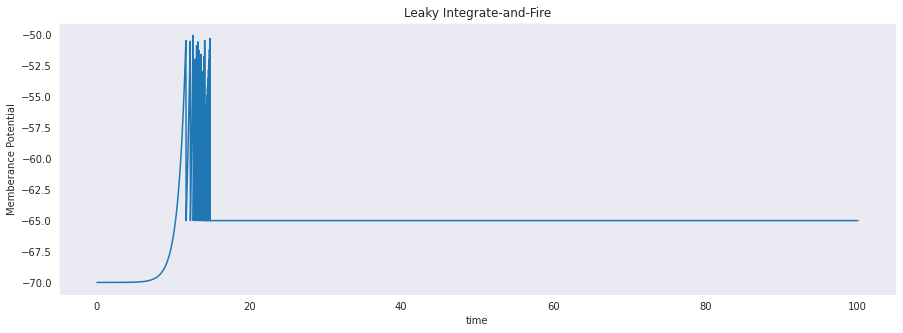

In [ ]:
lif.plot_model()

In [ ]:
def I4(t):
  return 100*t

In [ ]:
lif = LIF_model(I4, threshold=-55, u_rest=-65, u_reset=-60, R_m=20, tau_m=10)
lif.simulate()
data = lif.make_dataframe()

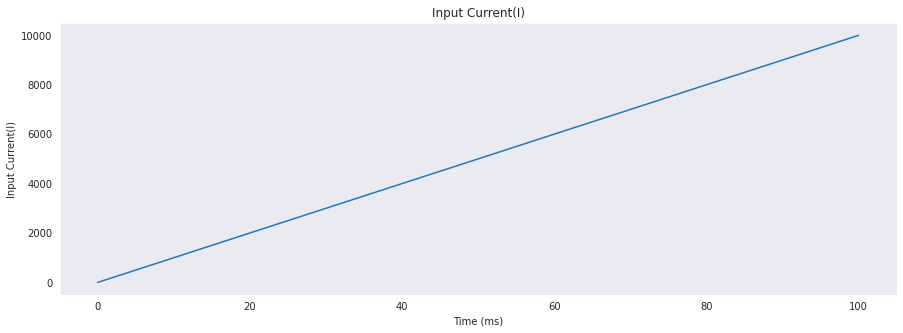

In [ ]:
x = np.linspace(0, 100, 8001)
plt.figure(figsize=(15, 5))
plt.plot(x, I4(x))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

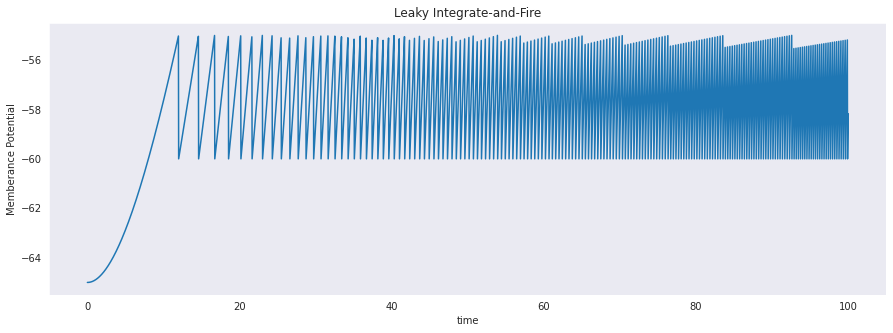

In [ ]:
lif.plot_model()

In [ ]:
def I5(t):
  return np.floor(t)   

In [ ]:
lif = LIF_model(I5, threshold=-50, u_rest=-65, u_reset=-65, R_m=25, tau_m=28)
lif.simulate()
data = lif.make_dataframe()

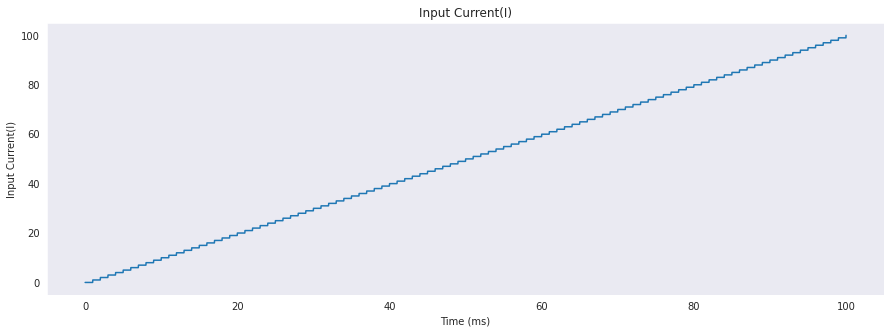

In [ ]:
x = np.linspace(0, 100, 8001)
plt.figure(figsize=(15, 5))
plt.plot(x, I5(x))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

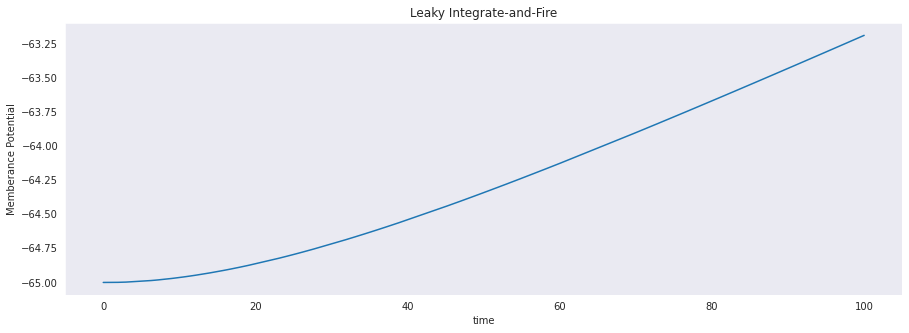

In [ ]:
lif.plot_model()

In [ ]:
import random
def I6(t):
  return random.random() * 1000 * t

In [ ]:
lif = LIF_model(I6, threshold=-55, u_rest=-70, u_reset=-65, R_m=10, tau_m=28)
lif.simulate()
data = lif.make_dataframe()

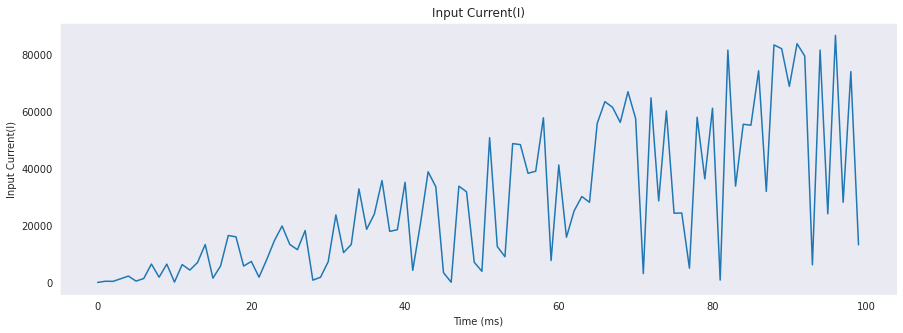

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(range(100), list(map(I6, range(100))))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

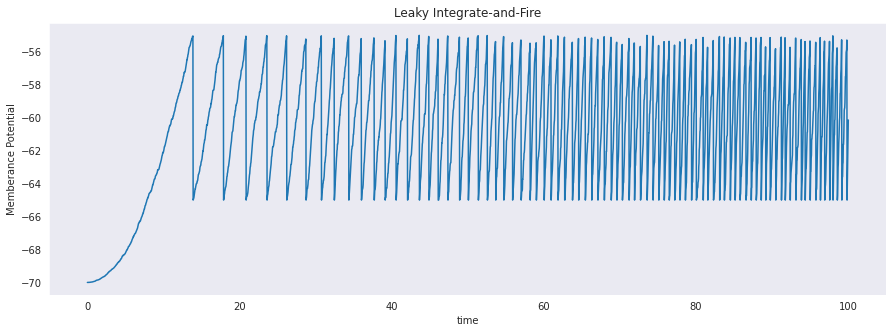

In [ ]:
lif.plot_model()

## **F-I Curve for LIF** 

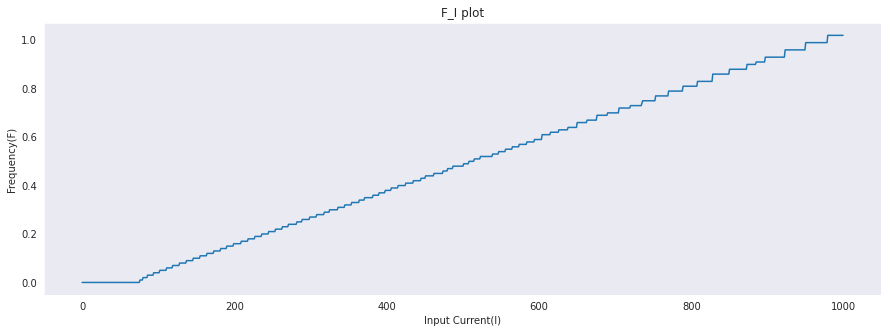

In [ ]:
F = []
for i in range(0, 1000):
  I_i = lambda x: 10 * i
  lif = LIF_model(I_i, threshold=-55, u_rest=-70, u_reset=-65, R_m=20, tau_m=18)
  lif.simulate()
  F.append(len(lif.t_spike)/lif.total_time)

plt.figure(figsize=(15, 5))
plt.plot(range(len(F)), F)
plt.xlabel('Input Current(I)')
plt.ylabel('Frequency(F)')
plt.title('F_I plot')
plt.show()

## **Exponential Leaky Integate-and-Fire**

In [ ]:
class ELIF_model():


    def __init__(self, I ,threshold, u_rest, u_reset, R_m, tau_m, D_T, theta):

        self.I = I
        self.total_time = 100
        self.delta = 0.03125
        self.u_list = [self.total_time]
        self.u_list[0] = u_rest
        self.t_time = [self.total_time]
        self.t_time[0] = 0
        self.t_spike = []
        self.U = u_rest
        self.threshold = threshold
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.R_m = R_m
        self.tau_m = tau_m
        self.D_T = D_T
        self.theta = theta


    def simulate(self):
      t0 = self.t_time[0]
      while True:    
        du = (-1 * (self.U - self.u_rest) + self.D_T * np.exp((self.U - self.theta)/self.D_T) + self.R_m * self.I(t0)/ 1000) / self.tau_m
        self.U += du * self.delta
        #self.U = self.u_rest + 1/1000 * self.R * self.I(t0) * (1 - np.exp( -t0 / self.tau_m))
        if self.U >= self.threshold:
          self.t_spike.append(t0)
          self.U = self.u_reset
        self.u_list.append(self.U)
        t0 += self.delta
        self.t_time.append(t0)
        if t0 > self.total_time:
          break
      return self.u_list


    def make_dataframe(self):
      data = pd.DataFrame(data = {'u': self.u_list , 'time':self.t_time })
      data['u'] = data['u'].round(4)
      data = data.set_index('time')
      return data

    def plot_model(self):
      plt.figure(figsize=(15, 5))
      sns.set_style("dark")
      plot = sns.lineplot(data = data, x = "time", y="u")
      plot.set_title('Exp Leaky Integrate-and-Fire')
      plot.set_ylabel('Memberance Potential')

In [ ]:
def I1(t):
  return 4000 * (np.sin(t) + 0.9)

In [ ]:
explif = ELIF_model(I1, threshold=-45, u_rest=-79, u_reset=-65, R_m=10, tau_m=8, D_T=1, theta=-60)
explif.simulate()
data = explif.make_dataframe()

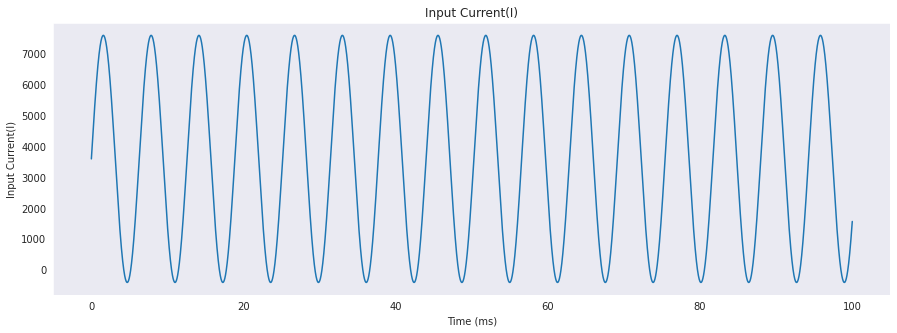

In [ ]:
x = np.linspace(0, 100, 8001)
plt.figure(figsize=(15, 5))
plt.plot(x, I1(x))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

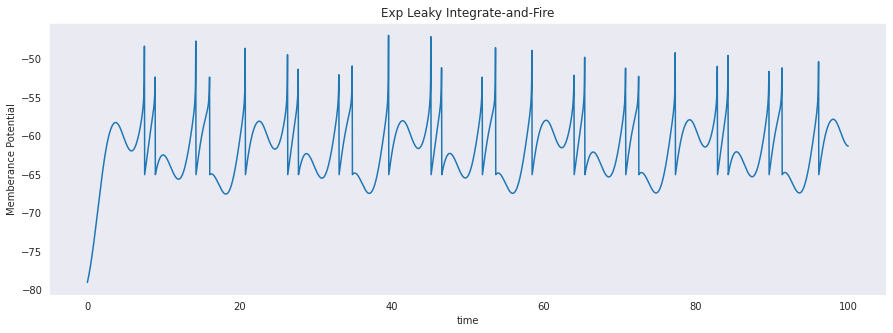

In [ ]:
explif.plot_model()

In [ ]:
def I2(t):
  if t > 30:
    return 3000
  return 0

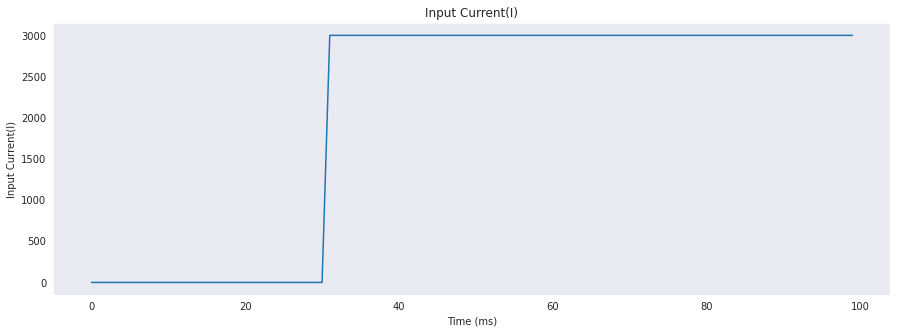

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(range(100), list(map(I2, range(100))))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

In [ ]:
explif = ELIF_model(I2, threshold=-55, u_rest=-75, u_reset=-60, R_m=20, tau_m=30, D_T=10, theta=-70)
explif.simulate()
data = explif.make_dataframe()

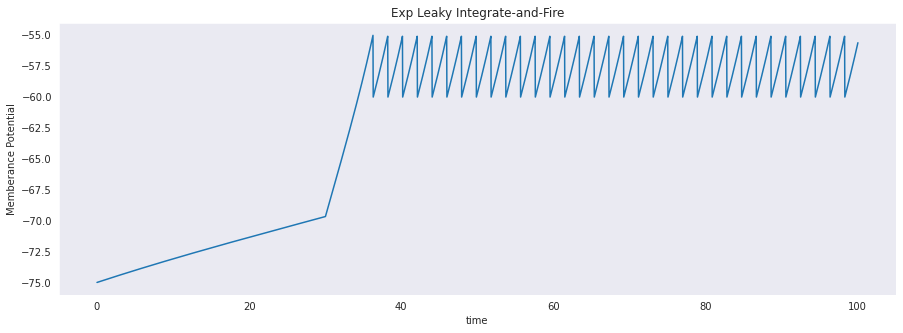

In [ ]:
explif.plot_model()

In [ ]:
def I3(t):
  return np.exp(t)

In [ ]:
explif = ELIF_model(I3, threshold=-55, u_rest=-75, u_reset=-65, R_m=4, tau_m=23,D_T=1, theta=-60)
explif.simulate()
data = explif.make_dataframe()

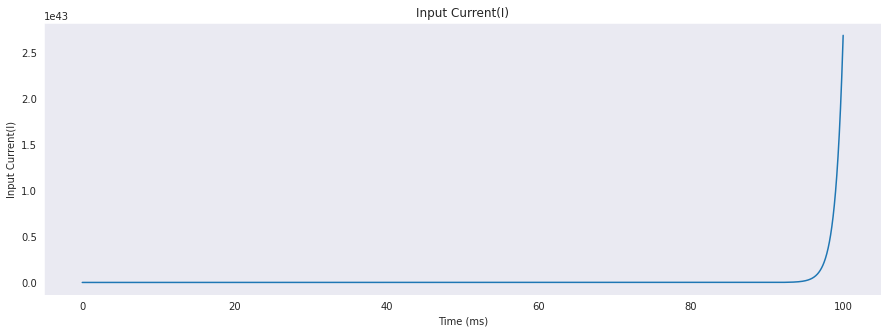

In [ ]:
x = np.linspace(0, 100, 8001)
plt.figure(figsize=(15, 5))
plt.plot(x, I3(x))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

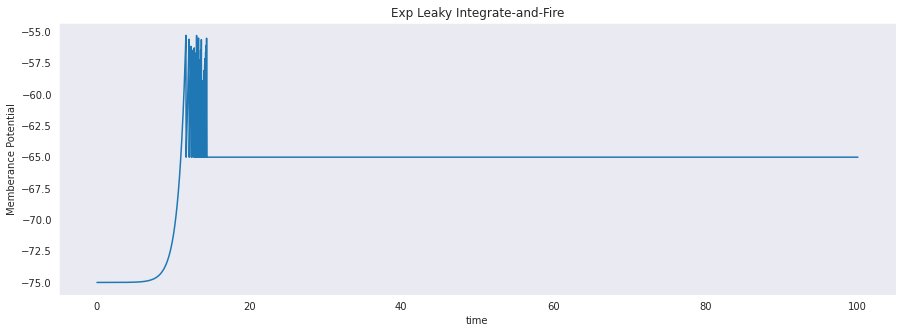

In [ ]:
explif.plot_model()

In [ ]:
def I4(t):
  return 100*t

In [ ]:
explif = ELIF_model(I4, threshold=-55, u_rest=-65, u_reset=-60, R_m=8, tau_m=10, D_T = 10, theta = -70)
explif.simulate()
data = explif.make_dataframe()

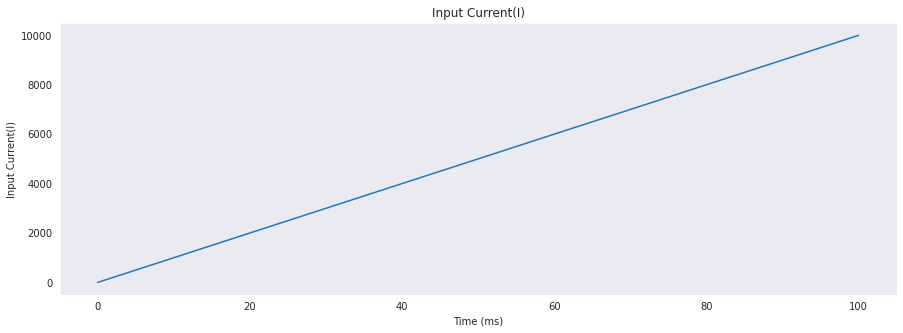

In [ ]:
x = np.linspace(0, 100, 8001)
plt.figure(figsize=(15, 5))
plt.plot(x, I4(x))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

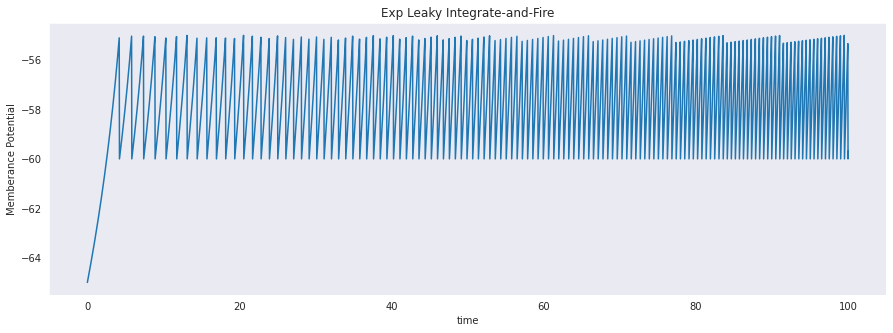

In [ ]:
explif.plot_model()

In [ ]:
def I5(t):
  return np.floor(t)   

In [ ]:
explif = ELIF_model(I5, threshold=-50, u_rest=-65, u_reset=-65, R_m=25, tau_m=28, D_T = 10, theta = -60)
explif.simulate()
data = explif.make_dataframe()

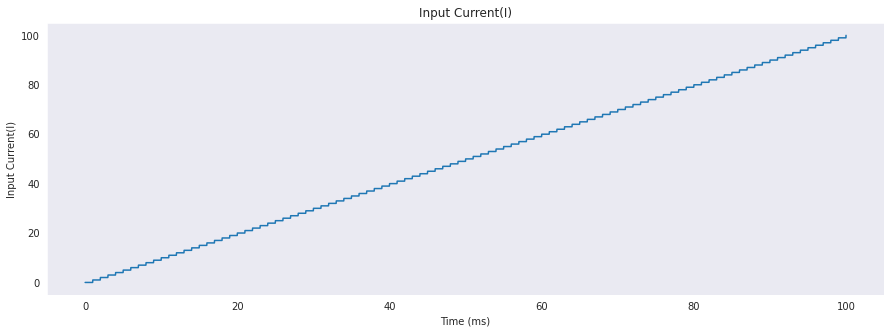

In [ ]:
x = np.linspace(0, 100, 8001)
plt.figure(figsize=(15, 5))
plt.plot(x, I5(x))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

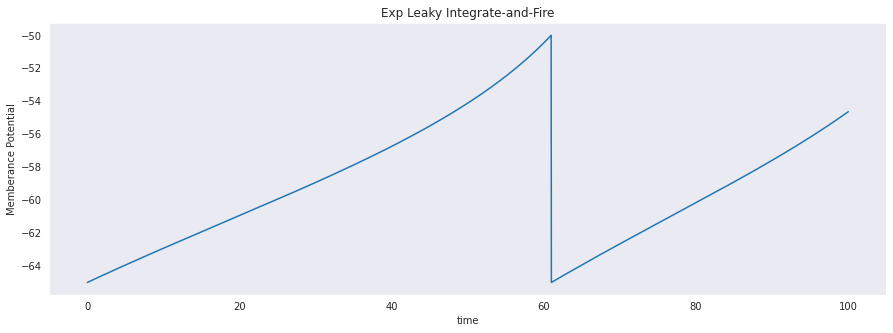

In [ ]:
explif.plot_model()

In [ ]:
import random
def I6(t):
  return random.random() * t * 1000

In [ ]:
explif = ELIF_model(I6, threshold=-55, u_rest=-70, u_reset=-65, R_m=20, tau_m=18, D_T = 10, theta = -60)
explif.simulate()
data = explif.make_dataframe()

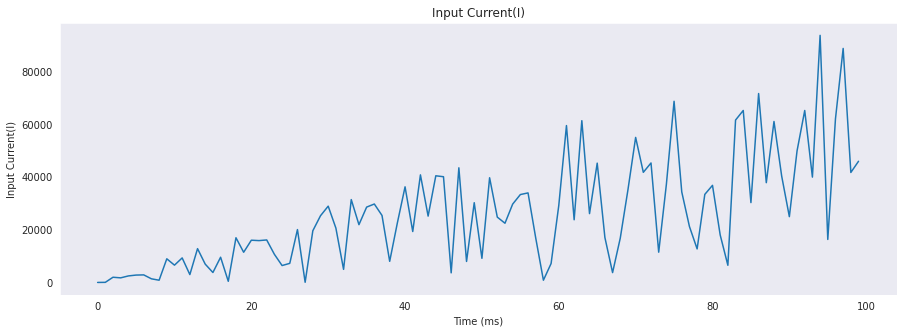

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(range(100), list(map(I6, range(100))))
plt.xlabel('Time (ms)')
plt.ylabel('Input Current(I)')
plt.axis('tight')
plt.title('Input Current(I)')
plt.show()

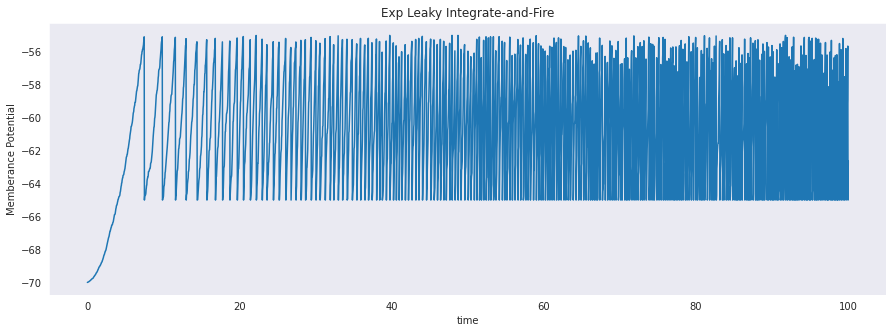

In [ ]:
explif.plot_model()

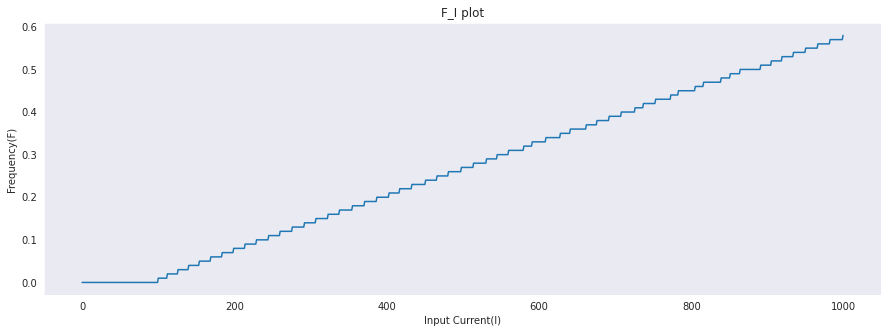

In [ ]:
F = []
for i in range(0, 1000):
  I_i = lambda x: 10 * i
  explif = ELIF_model(I_i, threshold=-45, u_rest=-79, u_reset=-65, R_m=10, tau_m=8, D_T=10, theta=-60)
  explif.simulate()
  F.append(len(explif.t_spike)/explif.total_time)
plt.figure(figsize=(15, 5))
plt.plot(range(len(F)), F)
plt.xlabel('Input Current(I)')
plt.ylabel('Frequency(F)')
plt.title('F_I plot')
plt.show()

## **F-I Curve for ELIF**

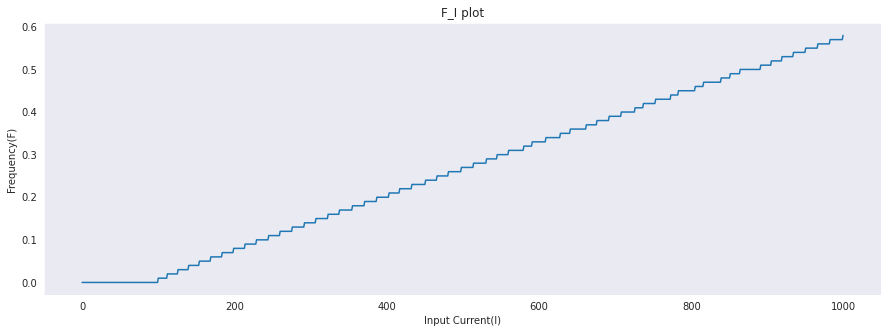

In [ ]:
F = []
for i in range(0, 1000):
  I_i = lambda x: 10 * i
  explif = ELIF_model(I_i, threshold=-45, u_rest=-79, u_reset=-65, R_m=10, tau_m=8, D_T=10, theta=-60)
  explif.simulate()
  F.append(len(explif.t_spike)/explif.total_time)
plt.figure(figsize=(15, 5))
plt.plot(range(len(F)), F)
plt.xlabel('Input Current(I)')
plt.ylabel('Frequency(F)')
plt.title('F_I plot')
plt.show()

## **Adaptive Exponential Leaky Integrate-and-Fire**

In [ ]:
class AELIF_model():


    def __init__(self, I ,threshold, u_rest, u_reset, R_m, tau_m, D_T, theta, a_k, b_k, tau_w):

        self.I = I
        self.total_time = 100
        self.delta = 0.03125
        self.u_list = [self.total_time]
        self.u_list[0] = u_rest
        self.t_time = [self.total_time]
        self.t_time[0] = 0
        self.t_spike = []
        self.w_list = []
        self.I_spike = []
        self.U = u_rest
        self.threshold = threshold
        self.u_rest = u_rest
        self.u_reset = u_reset
        self.R_m = R_m
        self.tau_m = tau_m
        self.D_T = D_T
        self.theta = theta
        self.a_k = a_k
        self.b_k = b_k
        self.tau_w = tau_w
        self.w = 0


    def simulate(self):
      t0 = self.t_time[0]
      while True:
        dw = ((self.a_k * (self.U - self.u_rest)) - self.w) / self.tau_w + self.b_k * len(self.t_spike)
        self.w += dw * self.delta    
        
        du = (-1 * (self.U - self.u_rest) + self.D_T * np.exp((self.U - self.theta)/self.D_T) - self.R_m * self.w / 1000 + self.R_m * self.I(t0)/ 1000) / self.tau_m
        self.U += du * self.delta

        if self.U >= self.threshold:
          self.t_spike.append(t0)
          self.U = self.u_reset
        self.u_list.append(self.U)
        self.w_list.append(self.w)
        t0 += self.delta
        self.t_time.append(t0)
        if t0 > self.total_time:
          break
      return self.u_list


    def make_dataframe(self):
      data = pd.DataFrame(data = {'u': self.u_list , 'time':self.t_time })
      data['u'] = data['u'].round(4)
      data = data.set_index('time')
      return data

    def plot_model(self):
      plt.figure(figsize=(15, 5))
      sns.set_style("dark")
      plot = sns.lineplot(data = data, x = "time", y="u")
      plot.set_title('Adaptive exp Leaky Integrate-and-Fire')
      plot.set_ylabel('Memberance Potential')

    def show_plot_wt(self):
      plt.figure(figsize=(15, 5))
      plt.plot(range(len(self.w_list)), self.w_list)
      plt.xlabel('Time (ms)')
      plt.ylabel('Adaption Current(w)')
      plt.axis('tight')
      plt.title('W_T')
      plt.show()

In [ ]:
def I1(x):
  return 4000 * (np.sin(x) + 0.9)

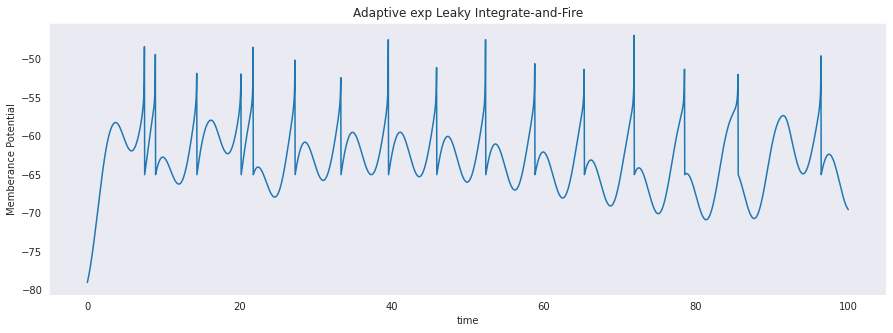

In [ ]:
ad_ex = AELIF_model(I1, threshold=-45, u_rest=-79, u_reset=-65, R_m=10, tau_m=8,D_T=1, theta=-60,a_k=0.01, b_k=100, tau_w=1)
ad_ex.simulate()
data = ad_ex.make_dataframe()
ad_ex.plot_model()

In [ ]:
def I2(t):
  if t > 30:
    return 4000
  return 0

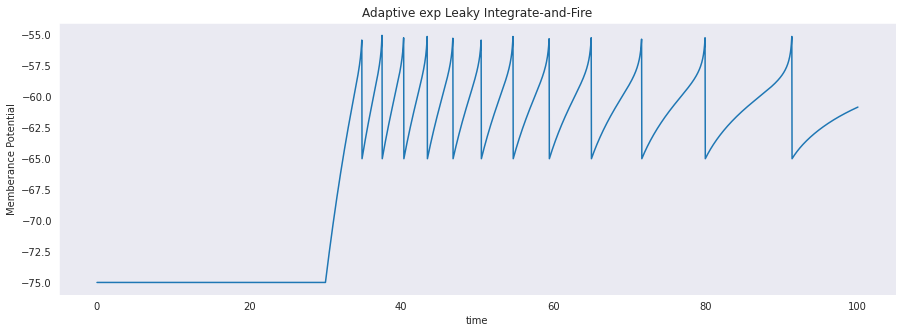

In [ ]:
ad_ex = AELIF_model(I2, threshold=-55, u_rest=-75, u_reset=-65, R_m=10, tau_m=8,D_T=1, theta=-60,a_k=0.1, b_k=200, tau_w=1)
ad_ex.simulate()
data = ad_ex.make_dataframe()
ad_ex.plot_model()

In [ ]:
def I3(t):
  return np.exp(t)

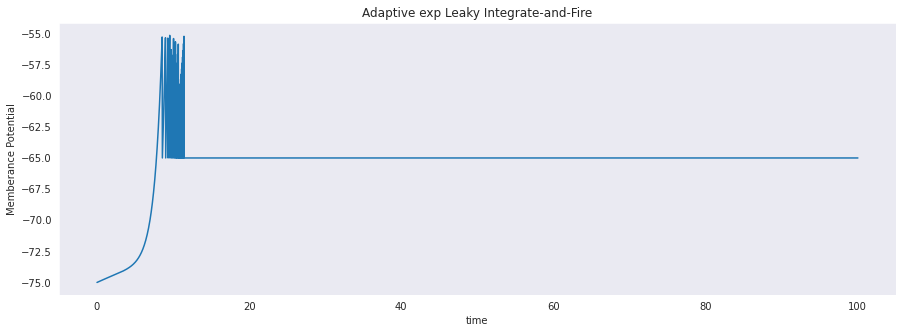

In [ ]:
ad_ex = AELIF_model(I3, threshold=-55, u_rest=-75, u_reset=-65, R_m=30, tau_m=8,D_T=10, theta=-60,a_k=0.01, b_k=300, tau_w=8)
ad_ex.simulate()
data = ad_ex.make_dataframe()
ad_ex.plot_model()

In [ ]:
def I4(t):
  return 100*t

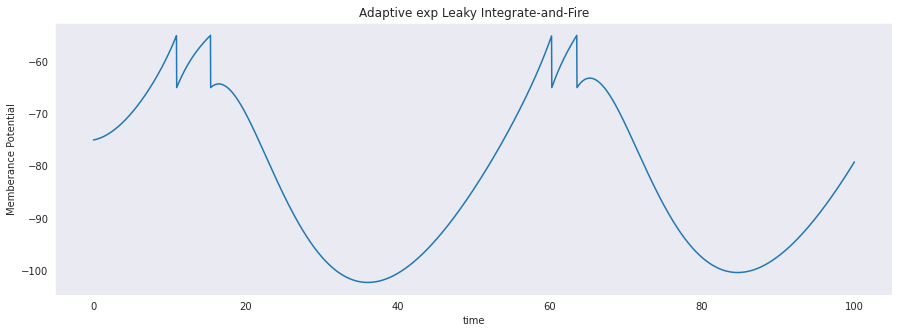

In [ ]:
ad_ex = AELIF_model(I4, threshold=-55, u_rest=-75, u_reset=-65, R_m=30, tau_m=8,D_T=10, theta=-60,a_k=0.01, b_k=300, tau_w=8)
ad_ex.simulate()
data = ad_ex.make_dataframe()
ad_ex.plot_model()

In [ ]:
def I5(t):
  return np.floor(t)

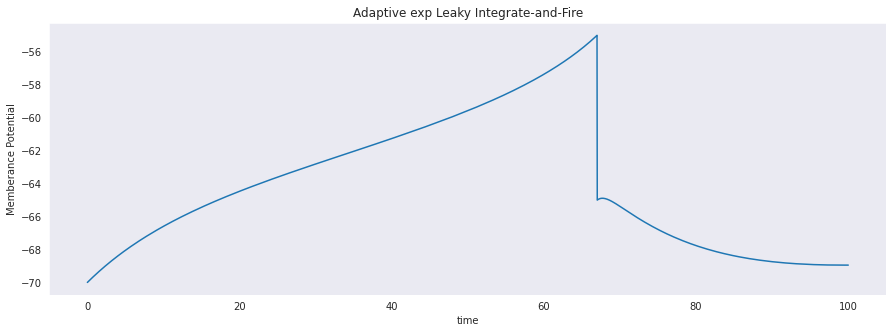

In [ ]:
ad_ex = AELIF_model(I5, threshold=-55, u_rest=-70, u_reset=-65, R_m=30, tau_m=8,D_T=10, theta=-60,a_k=0.01, b_k=200, tau_w=1)
ad_ex.simulate()
data = ad_ex.make_dataframe()
ad_ex.plot_model()

In [ ]:
def I6(t):
  return random.random() * t * 100

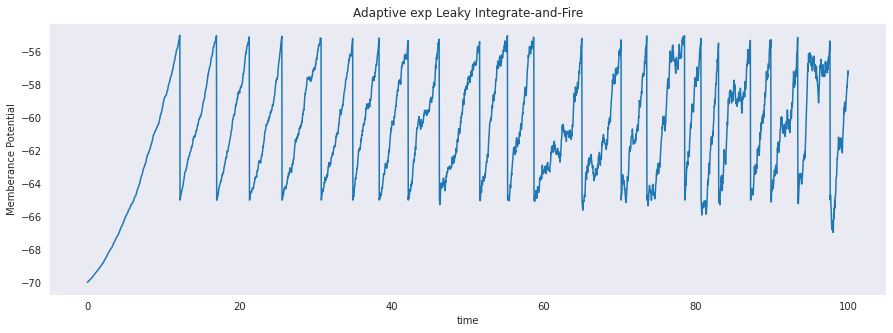

In [ ]:
ad_ex = AELIF_model(I6, threshold=-55, u_rest=-70, u_reset=-65, R_m=30, tau_m=8,D_T=10, theta=-60,a_k=0.01, b_k=200, tau_w=1)
ad_ex.simulate()
data = ad_ex.make_dataframe()
ad_ex.plot_model()

## **W-T Curve**

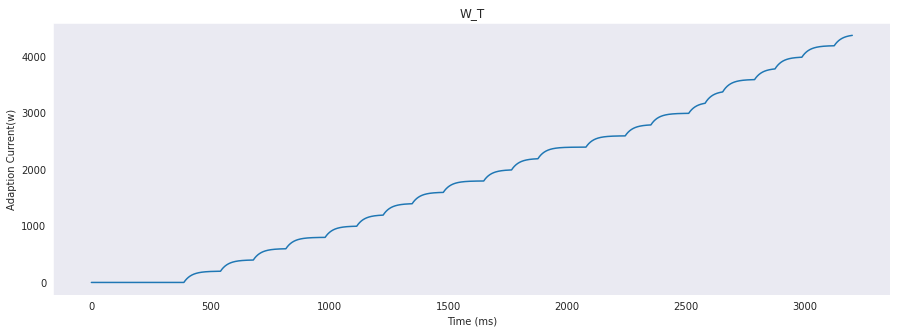

In [ ]:
ad_ex.show_plot_wt()